In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_digits

In [3]:
digit = load_digits()

In [4]:
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digit.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [7]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digit.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [9]:
digit.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [10]:
df = pd.DataFrame(digit.data, columns=digit.feature_names)

In [11]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
df['target']=digit.target

In [14]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [15]:
df.shape

(1797, 65)

In [16]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [18]:
s = digit.images[0]
s

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [19]:
s[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

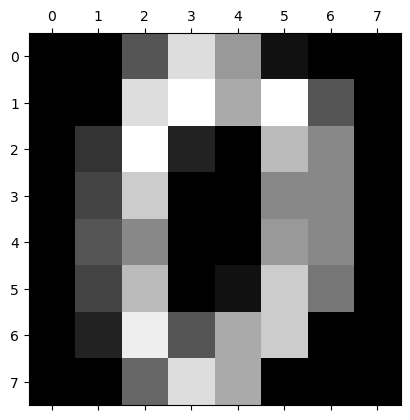

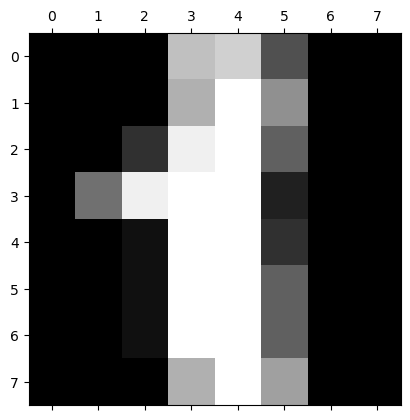

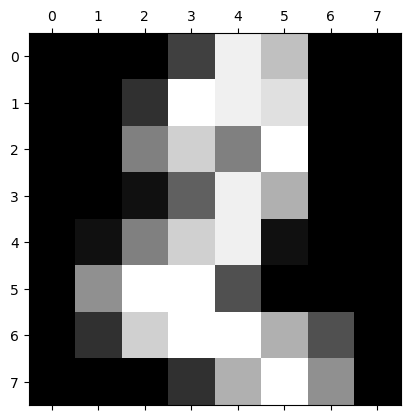

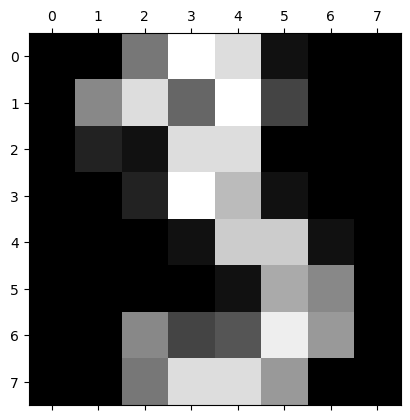

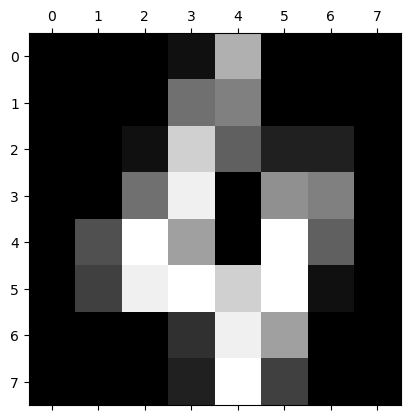

In [20]:
plt.gray()
for i in range(5):
    plt.matshow(digit.images[i])
    plt.show()

<Figure size 640x480 with 0 Axes>

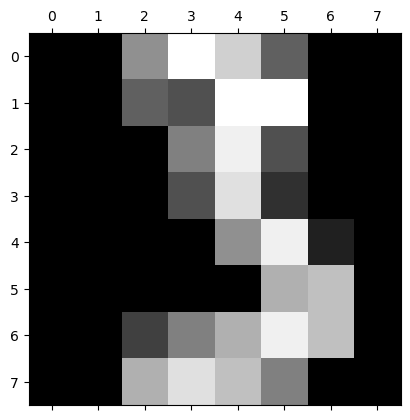

In [21]:
plt.gray()
plt.matshow(digit.images[45])
plt.show()

In [22]:
digit.target[45]

np.int64(3)

In [23]:
digit.target[55]

np.int64(0)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop("target", axis=1)

In [26]:
y = df.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [29]:
X = df.drop("target", axis=1)

In [30]:
y = df.target

In [31]:
X_train.shape

(1203, 64)

In [32]:
X_test.shape

(594, 64)

In [33]:
model = LogisticRegression(max_iter=100,)

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
model.score(X_test, y_test)

0.9629629629629629

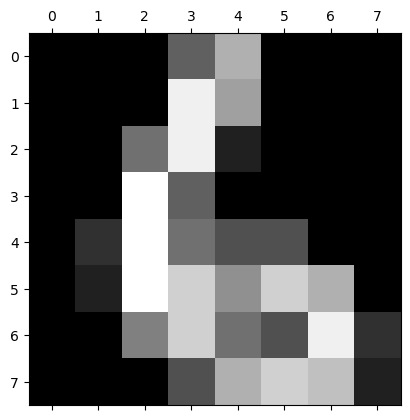

In [36]:
plt.matshow(digit.images[750])
plt.show()

In [37]:
digit.target[750]

np.int64(6)

In [38]:
 model.predict(digit.data[750].reshape(1, -1))

array([6])

In [39]:
y_pred = model.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 6, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [40]:
y_test[:5]

1245    6
220     9
1518    3
438     7
1270    2
Name: target, dtype: int64

In [41]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  1,  0,  1,  0,  0,  1,  2,  1],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 62,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 69,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 60,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 65]])

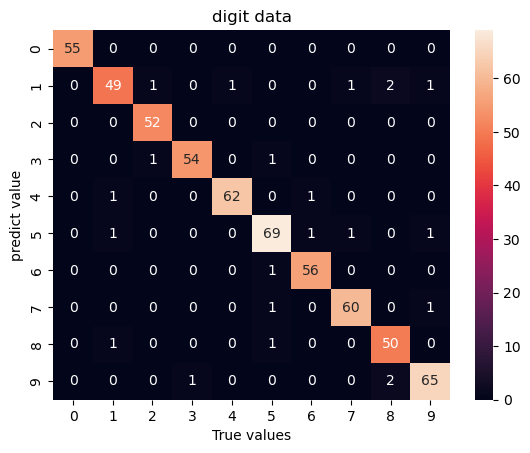

In [42]:
sns.heatmap(cm, annot=True)
plt.xlabel("True values")
plt.ylabel("predict value")
plt.title("digit data")
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
model1=  DecisionTreeClassifier()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8569023569023569

In [45]:
from sklearn import tree

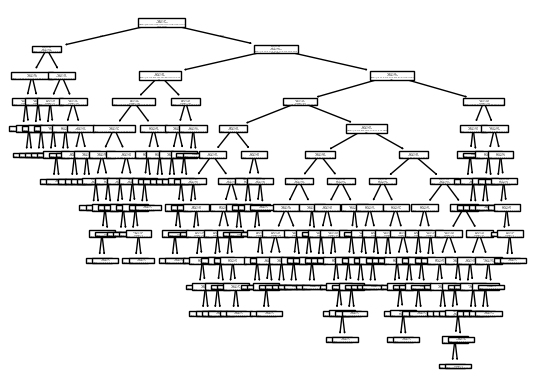

<Figure size 1200x800 with 0 Axes>

In [46]:
tree.plot_tree(model1.fit(X_train, y_train))
plt.figure(figsize=(12,8))
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier()

In [49]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
model.score(X_test,y_test)

0.9764309764309764

In [51]:
y_pred = model.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [52]:
cm = confusion_matrix(y_test,y_pred)

In [53]:
cm

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 70,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 65]])

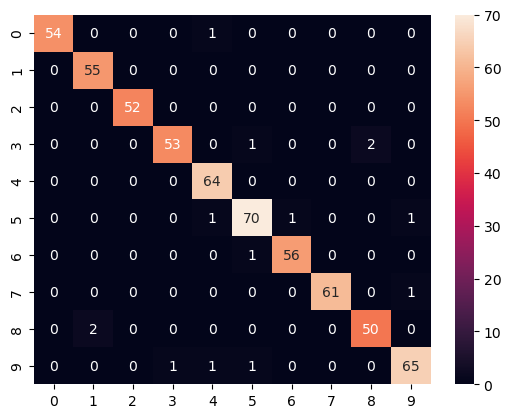

In [54]:
sns.heatmap(cm, annot=True)
plt.show()

In [55]:
import xgboost

In [56]:
boost = xgboost.XGBClassifier()
boost.fit(X_train, y_train)
boost.score(X_test, y_test)

0.9663299663299664